<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2024/blob/main/SMOT_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original class distribution: [180  20]
Resampled class distribution: [180 180]


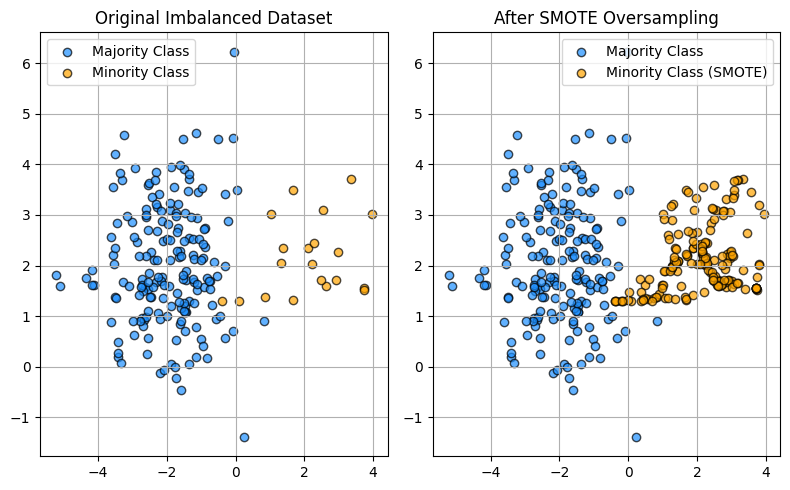

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], # 90% majority, 10% minority
                           n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=42)

print(f"Original class distribution: {np.bincount(y)}")

# Step 2: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"Resampled class distribution: {np.bincount(y_res)}")

# Step 3: Visualize the original and oversampled datasets with grid and colors
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Original data
ax[0].scatter(X[y==0][:, 0], X[y==0][:, 1], label='Majority Class', alpha=0.7, color='dodgerblue', edgecolor='k')
ax[0].scatter(X[y==1][:, 0], X[y==1][:, 1], label='Minority Class', alpha=0.7, color='orange', edgecolor='k')
ax[0].set_title("Original Imbalanced Dataset")
ax[0].legend()
ax[0].grid(True)

# After SMOTE
ax[1].scatter(X_res[y_res==0][:, 0], X_res[y_res==0][:, 1], label='Majority Class', alpha=0.7, color='dodgerblue', edgecolor='k')
ax[1].scatter(X_res[y_res==1][:, 0], X_res[y_res==1][:, 1], label='Minority Class (SMOTE)', alpha=0.7, color='orange', edgecolor='k')
ax[1].set_title("After SMOTE Oversampling")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.savefig("smote_oversampling.png", dpi=300)
plt.show()
